# Central Limit Theorem

Let's use the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) in a dataset.

Take a population and measure a value (size, weight, etc.) for each individual.

The important thing to know is that **whatever** the form of the distribution over the population, the **sampling** distribution tends to a Gaussian, and its dispersion is given by the Central Limit Theorem.

Let's verify this experimentally!

---

## Let's start

Run the following cell to import modules for the livecode

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

❓ Load the `"total_bill"` dataset from seaborn into a `df` variable and display the head

<details>
    <summary>💡 View hint</summary>
    You can use <a href="https://seaborn.pydata.org/generated/seaborn.load_dataset.html"><code>seaborn.load_dataset</code></a>
</details>

In [2]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


❓ How many rows are available in the dataset?

In [3]:
df.shape[0]

244

❓ Plot the distribution of the `total_bill` column in the restaurant

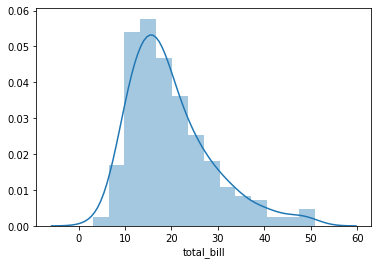

In [4]:
sns.distplot(df["total_bill"])

❓ What is the [**skewness**](https://whatis.techtarget.com/definition/skewness) value of this distribution?

In [5]:
df["total_bill"].skew()

1.1332130376158205

❓ Create variables `mu` and `sigma` storing the mean and standard deviation of the distribution of tips

In [6]:
mu = df["total_bill"].mean()
print(f"mu: {mu}")
sigma = df["total_bill"].std()
print(f"sigma: {sigma}")

mu: 19.78594262295082
sigma: 8.902411954856856


## Sampling

❓ Pick randomly and with replacement, 10 rows of the dataset, and compute the mean $\bar{x}$ of that sample.

Run this cell a few times, do you get the same result each time? Is this expected?

In [7]:
# df["total_bill"].sample(1000, replace=True).mean()
df["total_bill"].sample(5).mean()

14.373999999999999

❓ Create a `means` list storing a list of means of $N$ samples of size $n$.

Start with $n = 5$ and $N = 10$

In the same cell, **plot** the distribution of `means`. With $n$ constant, increase $N$ and observe. Then increase $n$ and test another range of $N$. What do you observe?

Try and plot a grid of 6 distributions for $ n \in \{ 1, 5, 50, 100, 500, 1000 \}$

CPU times: user 1.35 s, sys: 16.8 ms, total: 1.36 s
Wall time: 1.37 s


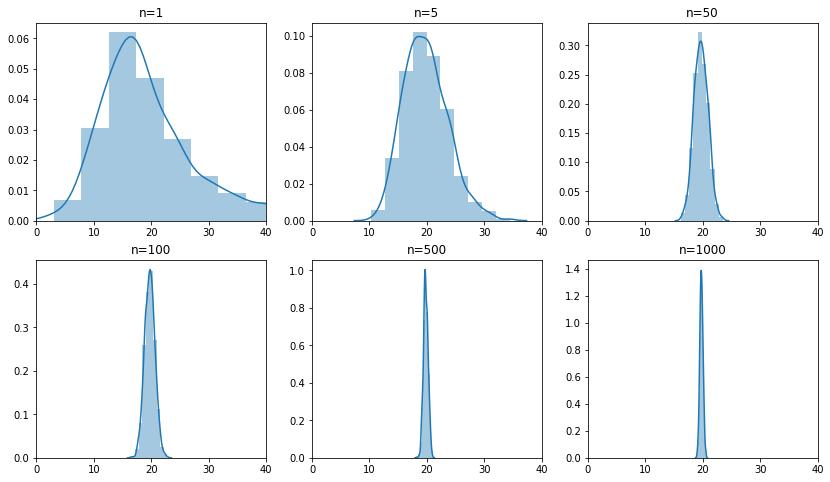

In [8]:
%%time
N = 1000

n_s = [1, 5, 50, 100, 500, 1000]
fix, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

for n, ax in zip(n_s, axes.flat):
    means = [df["total_bill"].sample(n, replace=True).mean() for i in range(N)]
    ax.set_title(f"n={n}")
    ax.set_xlim(0, 40)
    sns.distplot(means, bins=10, ax=ax)

## Checking the CLT

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/IllustrationCentralTheorem.png/400px-IllustrationCentralTheorem.png)

❓ Let's verify the Central Limit Theorem computationally:

For each value of `n`:
- Compare `mu` with the mean of means
- Compare `sigma` with the standard deviation of the means, (don't forget the $\sqrt n$ adjustment)
- Compute the `skewness` of the sampling distribution

In [9]:
N = 5000

n_s = [1, 5, 50, 100, 500, 1000]

print("        𝚫mu      𝚫sigma   𝚫skew    𝚫kurtosis")
for n in n_s:
    means = [df["total_bill"].sample(n, replace=True).mean() for i in range(N)]
    mu_diff = round(abs(mu - np.mean(means)), 5) 
    sigma_diff = round(abs(sigma / np.sqrt(n) - np.std(means)), 5)
    skew = round(abs(stats.skew(means)), 5)
    kurtosis = round(abs(stats.kurtosis(means)), 5)
    print(f"n={str(n).ljust(4)}: {mu_diff}  {sigma_diff}  {skew}  {kurtosis}")

        𝚫mu      𝚫sigma   𝚫skew    𝚫kurtosis
n=1   : 0.04564  0.06525  1.14787  1.21522
n=5   : 0.06764  0.01794  0.50649  0.32269
n=50  : 0.00062  0.03363  0.16706  0.03462
n=100 : 0.01187  0.00218  0.13429  0.06482
n=500 : 0.00594  0.00444  0.04368  0.05775
n=1000: 0.00563  0.00092  0.01067  0.13628


## Probability

Imagine I take 100 rows from the dataset. What is the probability that the cumulated total bill is **lower than 1800€**? 

❓ Plot `pdf` from [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) using `mu`, `sigma` and `n` for the distribution of samples of total bills.

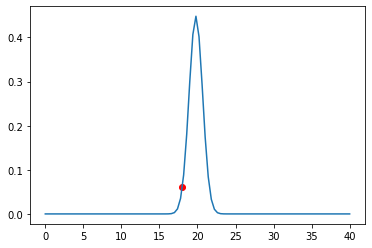

In [10]:
n = 100

target = 18

mean_bill_norm = stats.norm(mu, sigma / np.sqrt(n))
print(mean_bill_norm)
x = np.linspace(0, 40, 100)
y = mean_bill_norm.pdf(x)

plt.plot(x, y)
plt.scatter(target, mean_bill_norm.pdf(target), c='r')

❓ What is the probability we are looking for? Use the `cdf` method to find it.

In [11]:
mean_bill_norm.cdf(target)

0.022421007000834294

❓ Compute the z-score for the value `18€`

In [12]:
z = (target - mu) / (sigma / np.sqrt(n))
z

-2.006133429914429

❓ Plot the normal distribution (0, 1) and a red dot for the target (use the `pdf`)

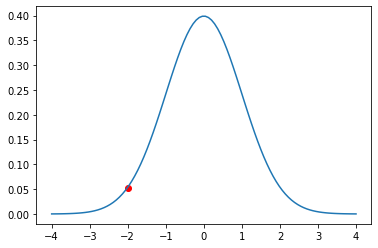

In [13]:
true_norm = stats.norm(0, 1)
x = np.linspace(-4, 4, 100)
y = true_norm.pdf(x)

plt.plot(x, y)
plt.scatter(z, true_norm.pdf(z), c='r')
plt.show()